In [1]:
import pickle

import numpy as np

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

In [2]:
with open('../Data/Ds', 'rb') as file: 
    Ds = pickle.load(file)

In [3]:
min_d = 0

max_d = 50

rad = np.arange(min_d, max_d, 0.5)

In [4]:
def Dr(r, A, D, **kwargs):
    return A*r**(D-1)

In [5]:
c_d = []

f_d = []

n_data = [[],[]]

for D in Ds:
    d_r = dict(zip(D, rad))

    filt_dr = {k: v for k, v in d_r.items() if v >6}

    s_filt_dr = dict(sorted(filt_dr.items(), key=lambda item: item[1]))

    n_D = list(s_filt_dr.keys())

    n_rad = list(s_filt_dr.values())

    params = curve_fit(Dr, n_rad, n_D)[0]

    n_data[0].append(n_rad)

    n_data[1].append(n_D)

    c_d.append(params[0])

    f_d.append(params[1])
    

In [6]:
print('Dimensión fractal:', round(np.mean(f_d)), '+-', round(np.std(f_d), ndigits=1))

Dimensión fractal: 1 +- 0.1


In [7]:
print('Coeficiente de ajuste a distribución de número:', round(np.mean(c_d), ndigits=1))

Coeficiente de ajuste a distribución de número: 0.7


In [8]:
rad1 = np.arange(5, 50, 0.1)

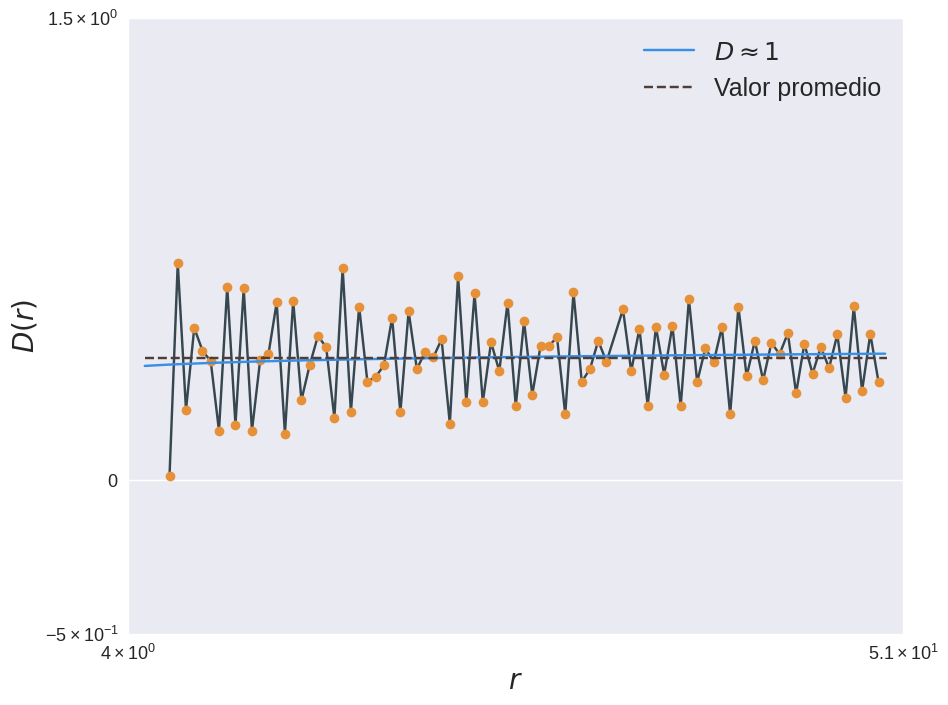

In [19]:
plt.figure(figsize=(10, 8))

plt.plot(n_data[0][16], n_data[1][16], color="#37474f")
plt.plot(n_data[0][16], n_data[1][16], 'o' ,color='#e69038')
plt.plot(rad1, Dr(rad1, c_d[16], f_d[16]), color='#388FE6', label=r'$D \approx 1$')

plt.hlines(np.mean(n_data[1][16]), xmin=5, xmax=50, colors='#4F3E37', linestyles='dashed', label='Valor promedio')

plt.xscale('symlog', linthresh=100)  
plt.yscale('symlog', linthresh=3)

plt.xlim(4, 51)
plt.ylim(-0.5, 1.5)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$D(r)$', fontsize=20)
#plt.title('Distribución de número (celdas en llamas)', fontsize=25)

plt.legend(prop={'size':18})

plt.savefig('../Results/Dr2.pdf')